<a href="https://colab.research.google.com/github/Ghzraza/Patch-Clamp-sim-with-Optogenetics-integrations-/blob/main/Patch_Clamp_Simuation_(with_Optognetic_pertubations)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

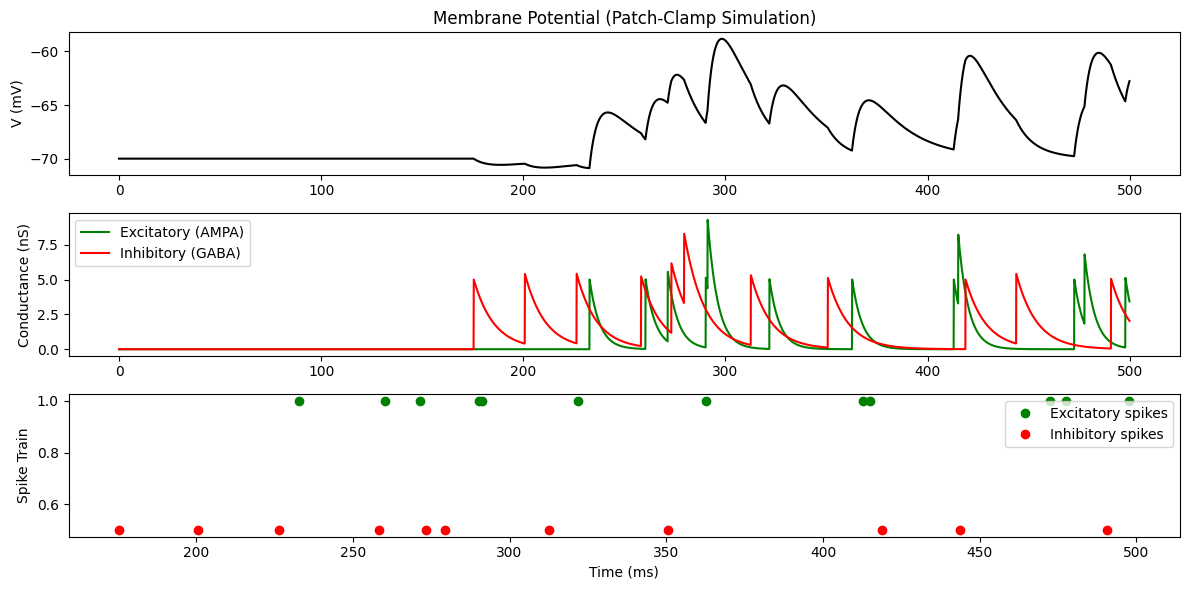

<Figure size 640x480 with 0 Axes>

In [10]:
# Patch-Clamp Simulation Notebook
# Author: Ghazal Raza
# Purpose: Demonstrate electrophysiology concepts, synaptic currents, and E/I balance
# Transferable to circuit neuroscience projects (Including Labonete lab's inhibition of cortical circuits and stress related behaviors)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# -----------------------------
# 1. Neuron Model: Leaky Integrate-and-Fire (LIF)
# -----------------------------

# Membrane parameters
C_m = 200e-12   # membrane capacitance (Farads)
g_L = 10e-9     # leak conductance (Siemens)
E_L = -70e-3    # resting potential (Volts)
V_th = -50e-3   # spike threshold (Volts)
V_reset = -65e-3 # reset potential after spike (Volts)

# Time parameters
dt = 0.1e-3      # time step (s)
T = 0.5          # total simulation time (s)
time = np.arange(0, T, dt)

# -----------------------------
# 2. Synaptic Inputs
# -----------------------------
# Excitatory synapses (AMPA-like)
E_exc = 0.0      # excitatory reversal potential (V)
g_exc_max = 5e-9 # max excitatory conductance (S)

# Inhibitory synapses (GABA-like)
E_inh = -75e-3   # inhibitory reversal potential (V)
g_inh_max = 5e-9 # max inhibitory conductance (S)

# Define spike trains for presynaptic neurons
np.random.seed(42)
rate_exc = 20   # Hz
rate_inh = 15   # Hz

spike_exc = np.random.rand(len(time)) < rate_exc*dt
spike_inh = np.random.rand(len(time)) < rate_inh*dt

# Conductance dynamics
tau_exc = 5e-3  # excitatory decay (s)
tau_inh = 10e-3 # inhibitory decay (s)

g_exc = np.zeros(len(time))
g_inh = np.zeros(len(time))

# -----------------------------
# 3. Simulate Membrane Potential
# -----------------------------
V = np.zeros(len(time))
V[0] = E_L

for t in range(1, len(time)):
    # Update synaptic conductances
    g_exc[t] = g_exc[t-1]*np.exp(-dt/tau_exc) + g_exc_max*spike_exc[t-1]
    g_inh[t] = g_inh[t-1]*np.exp(-dt/tau_inh) + g_inh_max*spike_inh[t-1]

    # Total synaptic current
    I_syn = g_exc[t]*(E_exc - V[t-1]) + g_inh[t]*(E_inh - V[t-1])

    # Update membrane potential
    dV = (g_L*(E_L - V[t-1]) + I_syn)/C_m * dt
    V[t] = V[t-1] + dV

    # Check for spike
    if V[t] >= V_th:
        V[t] = V_reset

# -----------------------------
# 4. Plot Results
# -----------------------------
plt.figure(figsize=(12,6))

# Membrane potential
plt.subplot(3,1,1)
plt.plot(time*1000, V*1000, color='black')
plt.title('Membrane Potential (Patch-Clamp Simulation)')
plt.ylabel('V (mV)')

# Excitatory and inhibitory conductances
plt.subplot(3,1,2)
plt.plot(time*1000, g_exc*1e9, label='Excitatory (AMPA)', color='green')
plt.plot(time*1000, g_inh*1e9, label='Inhibitory (GABA)', color='red')
plt.ylabel('Conductance (nS)')
plt.legend()

# Spike raster (simulated)
plt.subplot(3,1,3)
plt.plot(time[spike_exc]*1000, np.ones(np.sum(spike_exc)), 'go', label='Excitatory spikes')
plt.plot(time[spike_inh]*1000, np.ones(np.sum(spike_inh))*0.5, 'ro', label='Inhibitory spikes')
plt.ylabel('Spike Train')
plt.xlabel('Time (ms)')
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------
# 5. Optional Extensions
# -----------------------------
# - Add multiple neurons and connectivity matrices to simulate E/I balance in circuits
# - Implement optogenetic or chemogenetic perturbations
# - Vary synaptic weights to study effects of chronic stress or inhibitory subpopulation changes
# - Integrate with calcium imaging simulated signals
# Save plot to results/plots folder


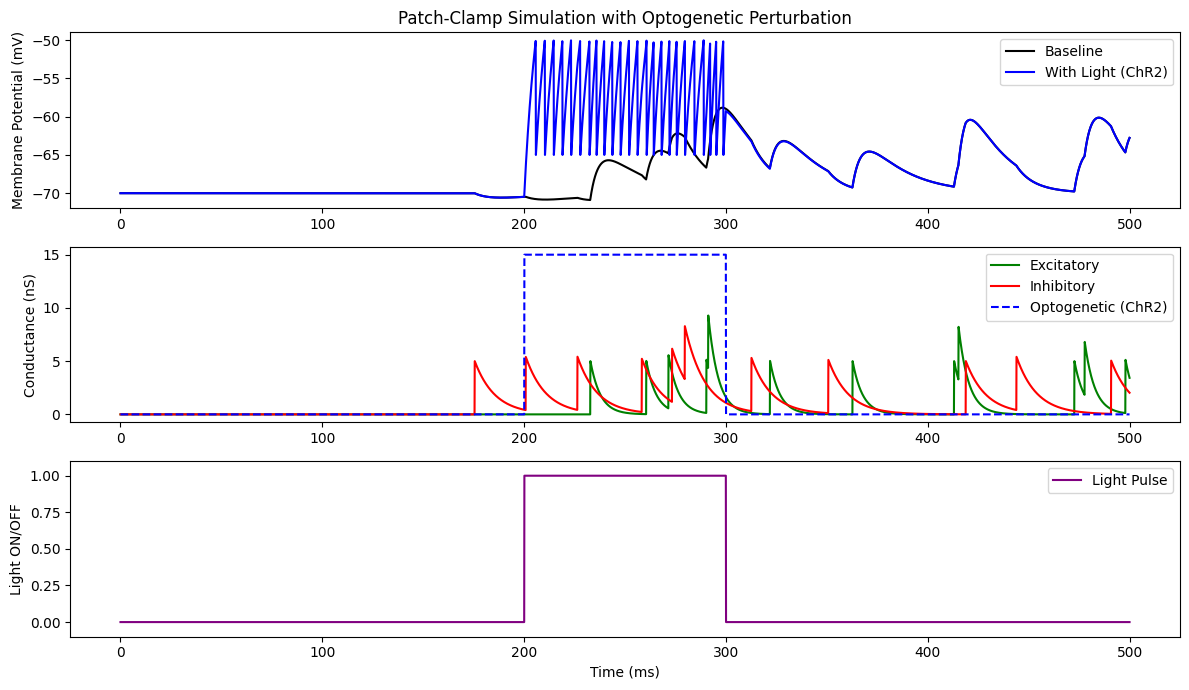

<Figure size 640x480 with 0 Axes>

In [9]:
# -----------------------------
# 6. Optogenetic Perturbation Simulation
# -----------------------------
# ChR2-like excitatory light-sensitive conductance
g_light_max = 15e-9          # maximum light-induced conductance (S)
E_light = 0.0                 # reversal potential for ChR2 (V)

# Define light pulse: ON between 200 ms and 300 ms
light_on = (time > 0.2) & (time < 0.3)

# Initialize light conductance array
g_light = np.zeros(len(time))

# Membrane potential with light perturbation
V_light = np.copy(V)  # start from previous baseline simulation

for t in range(1, len(time)):
    # Update synaptic conductances
    g_exc[t] = g_exc[t-1]*np.exp(-dt/tau_exc) + g_exc_max*spike_exc[t-1]
    g_inh[t] = g_inh[t-1]*np.exp(-dt/tau_inh) + g_inh_max*spike_inh[t-1]

    # Light conductance
    g_light[t] = g_light_max * light_on[t]

    # Total synaptic + optogenetic current
    I_syn_light = g_exc[t]*(E_exc - V_light[t-1]) + \
                  g_inh[t]*(E_inh - V_light[t-1]) + \
                  g_light[t]*(E_light - V_light[t-1])

    # Update membrane potential
    dV = (g_L*(E_L - V_light[t-1]) + I_syn_light)/C_m * dt
    V_light[t] = V_light[t-1] + dV

    # Check for spike
    if V_light[t] >= V_th:
        V_light[t] = V_reset

# -----------------------------
# 7. Plot Patch-Clamp with Optogenetic Perturbation
# -----------------------------
plt.figure(figsize=(12,7))

# Membrane potentials
plt.subplot(3,1,1)
plt.plot(time*1000, V*1000, label='Baseline', color='black')
plt.plot(time*1000, V_light*1000, label='With Light (ChR2)', color='blue')
plt.title('Patch-Clamp Simulation with Optogenetic Perturbation')
plt.ylabel('Membrane Potential (mV)')
plt.legend()

# Synaptic + light conductances
plt.subplot(3,1,2)
plt.plot(time*1000, g_exc*1e9, label='Excitatory', color='green')
plt.plot(time*1000, g_inh*1e9, label='Inhibitory', color='red')
plt.plot(time*1000, g_light*1e9, label='Optogenetic (ChR2)', color='blue', linestyle='--')
plt.ylabel('Conductance (nS)')
plt.legend()

# Light pulse visualization
plt.subplot(3,1,3)
plt.plot(time*1000, light_on, color='purple', label='Light Pulse')
plt.ylabel('Light ON/OFF')
plt.xlabel('Time (ms)')
plt.ylim(-0.1, 1.1)
plt.legend()

plt.tight_layout()
plt.show()
# Save plot to results/plots folder



In [6]:
import os

# Create results/plots folder if it doesn't exist
os.makedirs("results/plots", exist_ok=True)

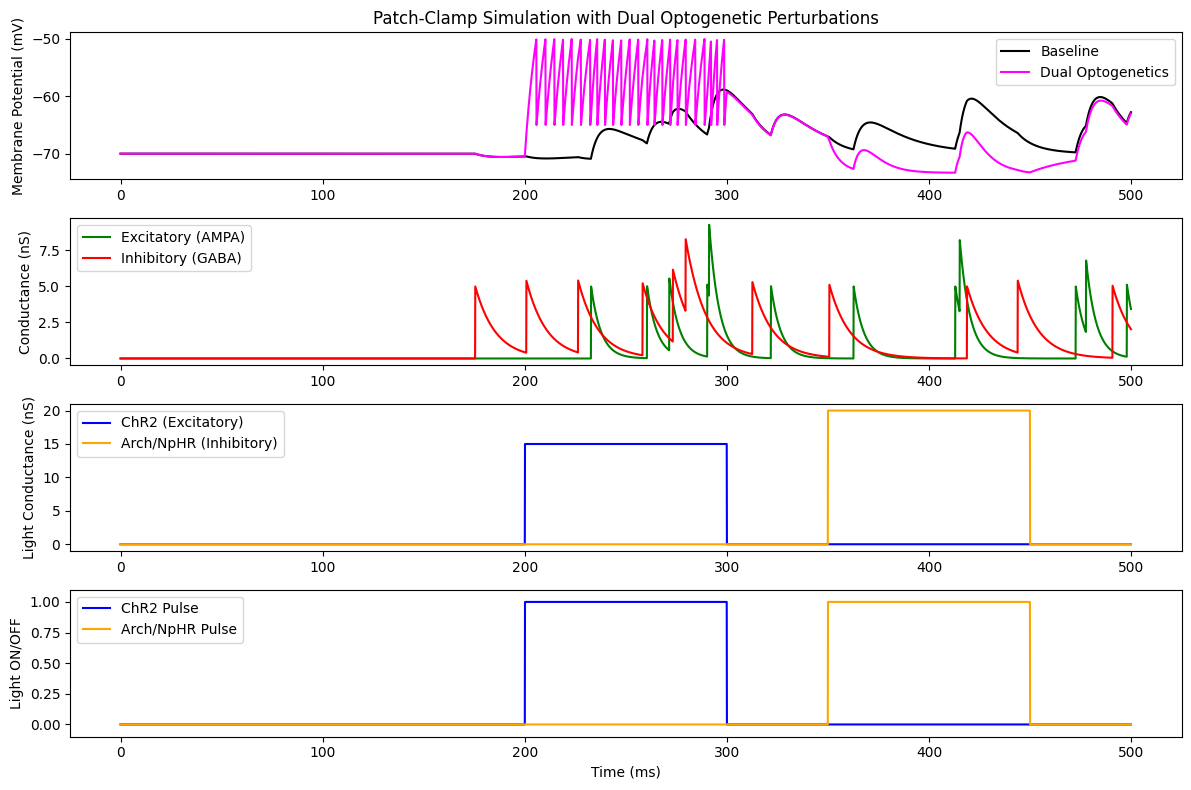

<Figure size 640x480 with 0 Axes>

In [12]:
# -----------------------------
# 8. Dual Optogenetic Perturbation (Excitatory + Inhibitory)
# -----------------------------

# Parameters
g_ChR2_max = 15e-9  # excitatory light conductance
E_ChR2 = 0.0        # reversal potential for ChR2 (V)

g_Arch_max = 20e-9  # inhibitory light conductance
E_Arch = -75e-3     # reversal potential for Arch/NpHR (V)

# Define light pulses
ChR2_on = (time > 0.2) & (time < 0.3)     # Excitatory pulse
Arch_on = (time > 0.35) & (time < 0.45)   # Inhibitory pulse

# Initialize conductances
g_ChR2 = np.zeros(len(time))
g_Arch = np.zeros(len(time))

# Membrane potential with dual optogenetics
V_dual = np.copy(V)  # start from baseline simulation

for t in range(1, len(time)):
    # Update synaptic conductances
    g_exc[t] = g_exc[t-1]*np.exp(-dt/tau_exc) + g_exc_max*spike_exc[t-1]
    g_inh[t] = g_inh[t-1]*np.exp(-dt/tau_inh) + g_inh_max*spike_inh[t-1]

    # Light conductances
    g_ChR2[t] = g_ChR2_max * ChR2_on[t]
    g_Arch[t] = g_Arch_max * Arch_on[t]

    # Total synaptic + optogenetic currents
    I_total = g_exc[t]*(E_exc - V_dual[t-1]) + \
              g_inh[t]*(E_inh - V_dual[t-1]) + \
              g_ChR2[t]*(E_ChR2 - V_dual[t-1]) + \
              g_Arch[t]*(E_Arch - V_dual[t-1])

    # Update membrane potential
    dV = (g_L*(E_L - V_dual[t-1]) + I_total)/C_m * dt
    V_dual[t] = V_dual[t-1] + dV

    # Check for spike
    if V_dual[t] >= V_th:
        V_dual[t] = V_reset

# -----------------------------
# 9. Plot Dual Optogenetic Simulation
# -----------------------------
plt.figure(figsize=(12,8))

# Membrane potential
plt.subplot(4,1,1)
plt.plot(time*1000, V*1000, label='Baseline', color='black')
plt.plot(time*1000, V_dual*1000, label='Dual Optogenetics', color='magenta')
plt.ylabel('Membrane Potential (mV)')
plt.title('Patch-Clamp Simulation with Dual Optogenetic Perturbations')
plt.legend()

# Synaptic conductances
plt.subplot(4,1,2)
plt.plot(time*1000, g_exc*1e9, label='Excitatory (AMPA)', color='green')
plt.plot(time*1000, g_inh*1e9, label='Inhibitory (GABA)', color='red')
plt.ylabel('Conductance (nS)')
plt.legend()

# Light conductances
plt.subplot(4,1,3)
plt.plot(time*1000, g_ChR2*1e9, label='ChR2 (Excitatory)', color='blue')
plt.plot(time*1000, g_Arch*1e9, label='Arch/NpHR (Inhibitory)', color='orange')
plt.ylabel('Light Conductance (nS)')
plt.legend()

# Light pulse timing
plt.subplot(4,1,4)
plt.plot(time*1000, ChR2_on, color='blue', label='ChR2 Pulse')
plt.plot(time*1000, Arch_on, color='orange', label='Arch/NpHR Pulse')
plt.ylabel('Light ON/OFF')
plt.xlabel('Time (ms)')
plt.ylim(-0.1, 1.1)
plt.legend()

plt.tight_layout()
plt.show()

